In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [23]:
X = 6*np.random.rand(200,1)-3
y = 0.8*X**2+0.96*X+np.random.randn(200,1)

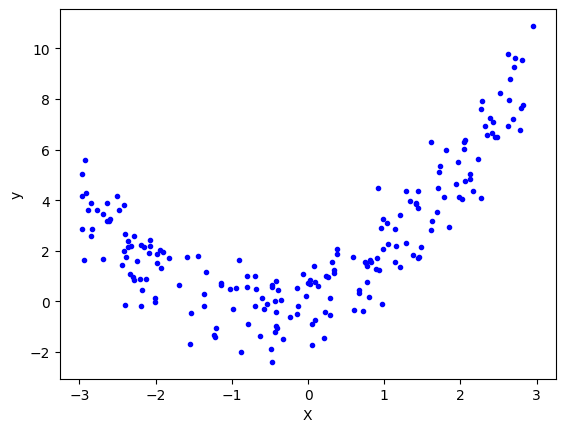

In [24]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
lr = LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_train)

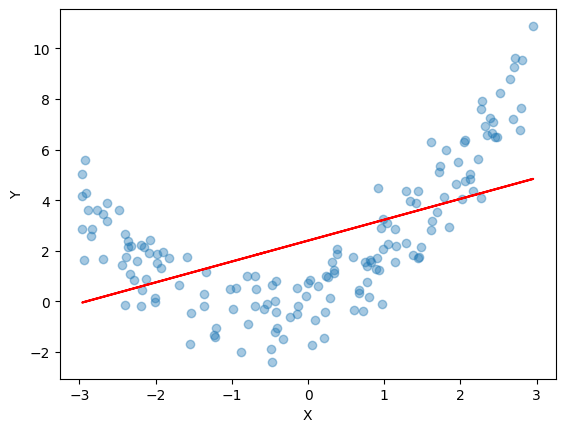

In [36]:
plt.plot(X_train,y_pred,color='red')
plt.scatter(X_train,y_train,alpha=0.4)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [39]:
poly  = PolynomialFeatures(degree =2,include_bias=False)
X_poly = poly.fit_transform(X_train)
X_tpoly = poly.transform(X_test)

In [41]:
X_poly[0]

array([-0.57504182,  0.3306731 ])

In [42]:
lr = LinearRegression()
lr.fit(X_poly, y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(X_poly)
y_pred.shape

(160, 1)

In [72]:

X_new = np.linspace(-3.5, 3.5, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_pred = lr.predict(X_new_poly)

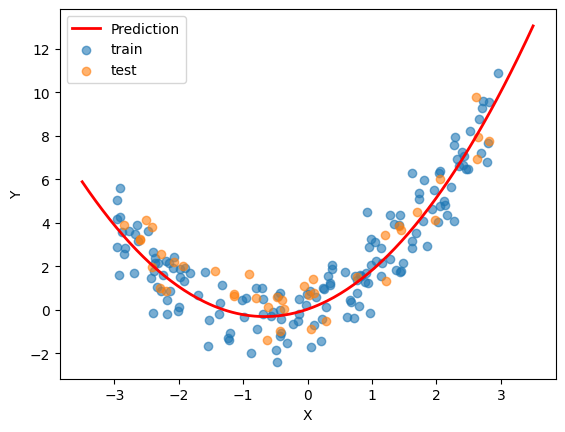

In [85]:
plt.plot(X_new ,y_pred,'r-',linewidth=2,label = 'Prediction')
plt.scatter(X_train,y_train,alpha=0.6,label = 'train')
plt.scatter(X_test,y_test,alpha=0.6,label='test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [98]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
  
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

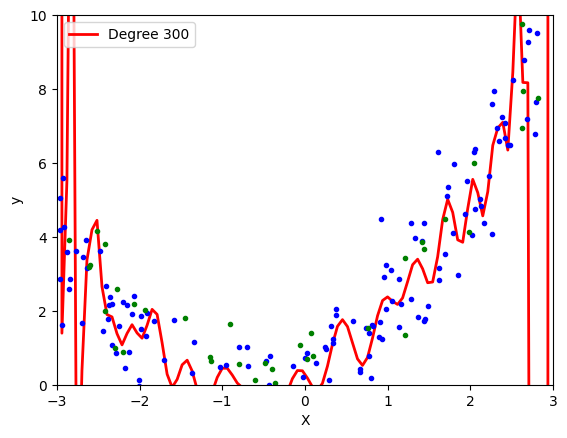

In [106]:
polynomial_regression(300)

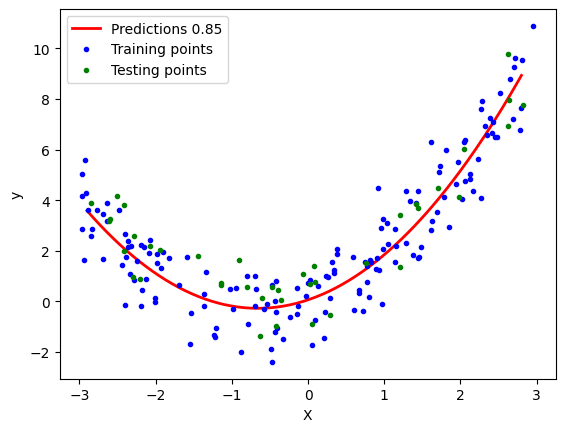

In [111]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train.ravel())

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()